# Temperature Prediction Project

## Data Description
This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. To predict the Temperature using the dataset.

Import required libraries

In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

## Loading the dataset

In [2]:
df=pd.read_csv('Temperature.csv')

df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


Data has been imported and we can see the first 5 rows of the data using df.head() function

## Exploratory Data Analysis

In [3]:
df.shape

(7752, 25)

This is the shape of data

In [4]:
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

These are the datatypes of each columns which includes float and object values 

In [5]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

These are the columns of data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [7]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

The data does has null values

In [8]:
df.describe(include='all')

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7750.000000,7750,7682.000000,7682.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,...,7677.000000,7677.000000,7677.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7725.000000,7725.000000
unique,NaN,310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,30-07-2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,13.000000,NaN,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,...,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.211568,NaN,2.969999,2.413961,14.668111,7.192004,2.947191,2.345347,2.183836,33.730589,...,1.762807,1.161809,1.206214,0.050352,0.079435,54.279780,1.370444,429.158867,3.128010,2.487613
min,1.000000,NaN,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,NaN,27.800000,21.700000,45.963543,84.222862,27.673499,22.089739,5.678705,37.266753,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000
50%,13.000000,NaN,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,NaN,32.000000,24.900000,67.190056,93.743629,31.710450,25.152909,8.032276,84.223616,...,0.018364,0.007896,0.000041,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000


The mean is higher than the median in LDAPS_LH, DEM.

There is a huge difference between 75th percentile and Mx column in LDAPS_WS,LDAPS_LH,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,DEM.

Standard deviation is higher in DEM,Solar Radiation,Next_Tmax,Next_Tmin columns.

In [9]:
df.Next_Tmax.unique()

array([29.1, 30.5, 31.1, 31.7, 31.2, 31.5, 30.9, 31.3, 32.6, 31.4, 30.8,
       33.1, 31.8, 30.6, 32. , 24.8, 27.3, 28.1, 27.9, 28.2, 28.9, 27.6,
       27.1, 27.5, 26.8, 28.7, 27.8, 29.2, 28.8, 30. , 30.1, 29.4, 31.6,
       30.2, 30.4, 32.5, 31. , 25.2, 28.4, 28.3, 27.4, 26.2, 28. , 26.7,
       28.6, 27.7, 28.5, 30.7, 29.6, 29.9, 29.3, 32.2, 33.6, 30.3, 32.3,
       29.8, 29.7, 29.5, 29. , 23.4, 26.4, 26.6, 26.1, 25.4, 27.2, 27. ,
       26.3, 25.5, 25.6, 25.9, 23. , 26.5, 26. , 25.7, 22.4, 25.8, 25.1,
       24.9, 24.3, 24.5, 25.3, 21.8, 24.7, 25. , 24.6, 23.6, 24.1, 23.2,
       23.7, 24.2, 23.8, 23.9, 31.9, 23.1, 33. , 32.7, 26.9, 32.1, 33.3,
       32.4, 33.4, 33.5, 34.8, 34. , 34.3, 34.5,  nan, 32.8, 33.7, 33.2,
       32.9, 34.1, 34.9, 35.3, 34.6, 35. , 33.9, 34.7, 36.6, 34.4, 35.8,
       35.2, 33.8, 35.6, 35.1, 34.2, 36. , 35.5, 35.4, 21.6, 23.5, 24.4,
       24. , 35.9, 36.1, 22.5, 22.8, 36.2, 21.1, 23.3, 22. , 22.7, 20.9,
       22.2, 22.1, 37. , 36.9, 22.9, 35.7, 37.1, 22

Target variable is a continuous variable

In [10]:
df.Slope.unique()

array([2.785    , 0.5141   , 0.2661   , 2.5348   , 0.5055   , 0.1457   ,
       0.0985   , 1.5629   , 0.4125   , 5.1782   , 0.6233   , 0.5931   ,
       2.6865   , 0.618    , 0.8552   , 2.2579   , 0.697    , 1.2313   ,
       1.7678   , 4.7296   , 0.5721   , 0.1332   , 0.1554   , 0.2223   ,
       0.2713   , 0.0984746, 5.17823  ])

##  Extracting  year column from Date

In [11]:
df["Date"]=pd.to_datetime(df["Date"])
df["Date"]

0      2013-06-30
1      2013-06-30
2      2013-06-30
3      2013-06-30
4      2013-06-30
          ...    
7747   2017-08-30
7748   2017-08-30
7749   2017-08-30
7750          NaT
7751          NaT
Name: Date, Length: 7752, dtype: datetime64[ns]

In [12]:
df["Date"]=df["Date"].dt.year

In [13]:
df["Date"]

0       2013.0
1       2013.0
2       2013.0
3       2013.0
4       2013.0
         ...  
7747    2017.0
7748    2017.0
7749    2017.0
7750       NaN
7751       NaN
Name: Date, Length: 7752, dtype: float64

In [14]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,2013.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,2013.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,2013.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,2013.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,2013.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [15]:
df.dtypes

station             float64
Date                float64
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

All the data converted to same format

## Replacing Nan Values

In [16]:
df=df.replace(np.nan,df.mean())

In [17]:
df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

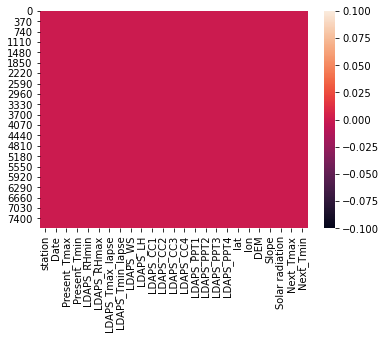

In [18]:
sns.heatmap(df.isnull())

There are no missing data or null values 

In [19]:
dfcor=df.corr()
dfcor

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
station,1.000000,0.000000e+00,0.112655,0.131646,-0.066733,-0.166984,0.069107,0.104758,0.005277,-0.133357,...,-0.008250,-0.012461,-0.010401,-0.237502,-0.118704,-2.558297e-01,-9.006090e-02,-0.019001,0.107983,0.128293
Date,0.000000,1.000000e+00,0.059800,0.037396,-0.002045,-0.141832,0.016172,-0.004693,-0.111358,0.057077,...,-0.042873,0.047173,0.037973,0.000000,0.000000,4.801019e-18,-1.404294e-18,-0.007729,0.059995,0.023136
Present_Tmax,0.112655,5.980007e-02,1.000000,0.618760,-0.204571,-0.301787,0.570129,0.623496,-0.121820,0.135463,...,-0.099449,-0.120367,-0.099607,-0.052615,0.009020,-1.871206e-01,-1.058092e-01,-0.025439,0.610348,0.622741
Present_Tmin,0.131646,3.739568e-02,0.618760,1.000000,0.123143,-0.015140,0.464151,0.762993,-0.034675,-0.009258,...,0.068176,-0.046126,-0.062965,-0.078475,-0.043461,-2.502747e-01,-1.463390e-01,0.053578,0.471806,0.796670
LDAPS_RHmin,-0.066733,-2.044507e-03,-0.204571,0.123143,1.000000,0.579141,-0.564580,0.089476,0.294361,-0.070858,...,0.390967,0.240642,0.168595,0.087099,-0.076237,1.021149e-01,1.237439e-01,0.244080,-0.437898,0.095019
LDAPS_RHmax,-0.166984,-1.418320e-01,-0.301787,-0.015140,0.579141,1.000000,-0.373404,-0.114143,0.135333,0.238579,...,0.229050,0.134607,0.117853,0.195798,0.025667,1.771681e-01,2.195989e-01,0.149261,-0.283738,-0.071997
LDAPS_Tmax_lapse,0.069107,1.617217e-02,0.570129,0.464151,-0.564580,-0.373404,1.000000,0.654021,-0.311996,0.048010,...,-0.242122,-0.188115,-0.160273,-0.042093,0.090666,-1.788954e-01,-1.623324e-01,0.047971,0.827189,0.586868
LDAPS_Tmin_lapse,0.104758,-4.693413e-03,0.623496,0.762993,0.089476,-0.114143,0.654021,1.000000,-0.130035,-0.134761,...,0.000870,-0.088575,-0.094655,-0.096257,-0.026701,-1.954553e-01,-1.858487e-01,0.159975,0.586983,0.880176
LDAPS_WS,0.005277,-1.113577e-01,-0.121820,-0.034675,0.294361,0.135333,-0.311996,-0.130035,1.000000,0.006711,...,0.191886,0.161684,0.144085,0.036657,-0.059466,1.910530e-01,1.716286e-01,0.121759,-0.342729,-0.096576
LDAPS_LH,-0.133357,5.707733e-02,0.135463,-0.009258,-0.070858,0.238579,0.048010,-0.134761,0.006711,1.000000,...,-0.077545,0.016102,0.019979,0.133221,0.025822,5.513344e-02,8.678088e-02,-0.047384,0.157616,-0.055440


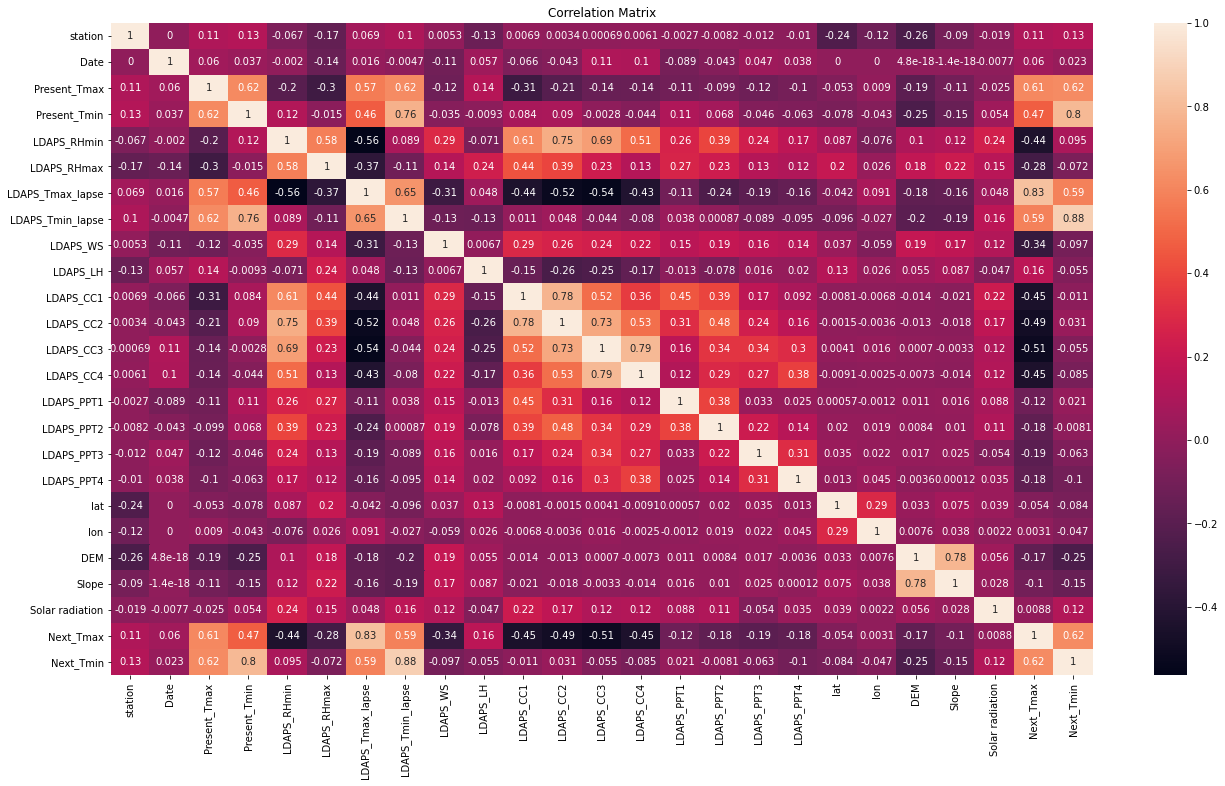

In [20]:
plt.figure(figsize=[22,12])
sns.heatmap(dfcor,annot=True)
plt.title("Correlation Matrix")
plt.show()

Next_Tmax is negatively correlated with LDAPS_RHmin,LDAPS_CC1,LDAPS_C2,LDAPS_CC3,LDAPS_CC4.

Dem and slope is positively correlated to each other.

Next_Tmin is negatively correlated with LDAPS_RHmin and LDAPS_RHmax.

Next_Tmin and Present_Tmax,Present_Tmin  are positively correlated with each other.

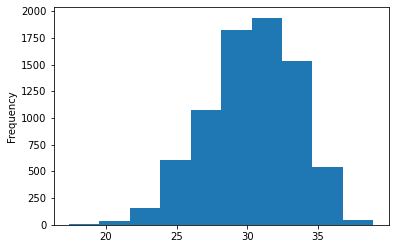

In [22]:
df['Next_Tmax'].plot.hist()

Group 30 has highest frequency

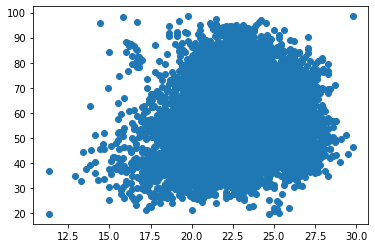

In [24]:
plt.scatter(df['Next_Tmin'],df['LDAPS_RHmin'])
plt.show()

This shows the relation between LDAPS_RHmin and Next_Tmin relationship

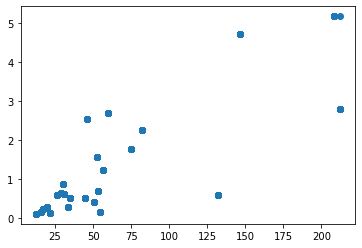

In [28]:
plt.scatter(df['DEM'],df['Slope'])
plt.show()

This shows the relation between DEM and Slope relationship

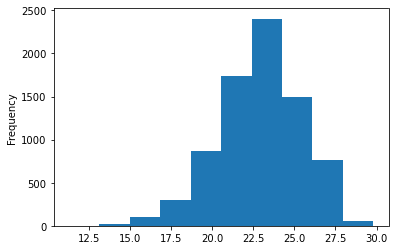

In [29]:
df['Next_Tmin'].plot.hist()

Frequency is high in 22.5

## Checking Outliers using boxplot

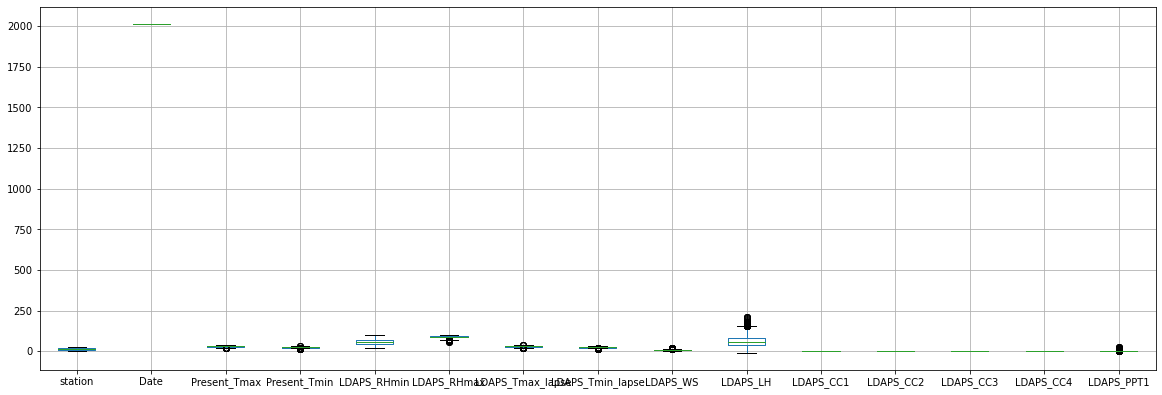

In [30]:
df.iloc[:,0:15].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

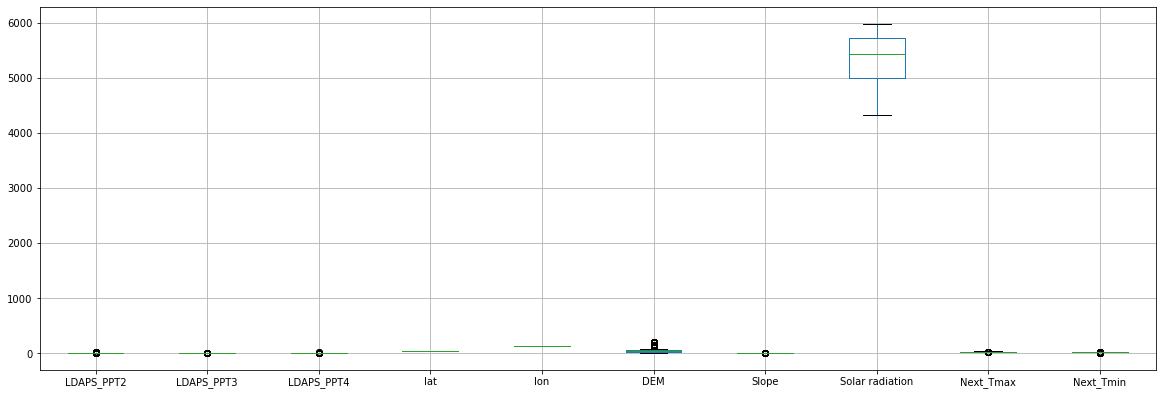

In [31]:
df.iloc[:,15:25].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

There are ouliers in many columns

## Removing Outliers

In [32]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.6643153 , 1.41439603, 0.36132577, ..., 1.51793488, 0.37628214,
        0.6975993 ],
       [1.52562236, 1.41439603, 0.72108401, ..., 1.22994952, 0.07209725,
        0.17406357],
       [1.38692941, 1.41439603, 0.61960809, ..., 1.21653443, 0.26425985,
        0.38974413],
       ...,
       [1.6643153 , 1.41439603, 2.22171758, ..., 2.0743251 , 0.79263444,
        2.2279345 ],
       [0.        , 0.        , 3.30412736, ..., 2.35821196, 4.12345278,
        4.68452522],
       [0.        , 0.        , 2.64912642, ..., 1.51793488, 2.76237361,
        2.76579089]])

In [33]:
threshold=3
print(np.where(z>3))

(array([  25,   25,   26, ..., 7751, 7751, 7751], dtype=int64), array([ 8, 15, 15, ..., 15, 16, 17], dtype=int64))


In [34]:
z[25][8]

3.9161348848797526

In [35]:
z[7751][17]

13.651789982199812

In [36]:
df_new=df[(z<3).all(axis=1)]

In [37]:
 df.shape

(7752, 25)

In [38]:
df_new.shape

(6894, 25)

In [39]:
loss_percent=(7752-6894)/7752*100
print(loss_percent)

11.06811145510836


## Checking skewness

In [40]:
x=df_new.iloc[:,0:23]

In [41]:
x

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation
0,1.0,2013.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996
1,2.0,2013.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500
2,3.0,2013.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664
3,4.0,2013.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844
4,5.0,2013.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,2017.0,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,...,0.004380,0.0,0.0,0.0,0.0,37.5507,127.040,26.2980,0.5721,4456.024414
7746,22.0,2017.0,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,...,0.017678,0.0,0.0,0.0,0.0,37.5102,127.086,21.9668,0.1332,4441.803711
7747,23.0,2017.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.0,0.0,0.0,0.0,37.5372,126.891,15.5876,0.1554,4443.313965
7748,24.0,2017.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.0,0.0,0.0,0.0,37.5237,126.909,17.2956,0.2223,4438.373535


In [42]:
x.skew()

station             0.002792
Date                0.010998
Present_Tmax       -0.272653
Present_Tmin       -0.225479
LDAPS_RHmin         0.305740
LDAPS_RHmax        -0.688257
LDAPS_Tmax_lapse   -0.109372
LDAPS_Tmin_lapse   -0.382667
LDAPS_WS            1.087781
LDAPS_LH            0.568781
LDAPS_CC1           0.593990
LDAPS_CC2           0.500911
LDAPS_CC3           0.700217
LDAPS_CC4           0.710930
LDAPS_PPT1          3.731226
LDAPS_PPT2          4.843672
LDAPS_PPT3          5.482625
LDAPS_PPT4          5.927822
lat                 0.108251
lon                -0.275508
DEM                 1.764031
Slope               1.593600
Solar radiation    -0.505353
dtype: float64

There is skewness in Fnlwgt,Race,Capital_gain,Capital_loss,Native_country,Workclass,Relationship

## Removing skewness

In [43]:
from sklearn.preprocessing import power_transform
df_income=power_transform(x)
df_income=pd.DataFrame(df_income,columns=x.columns)

In [44]:
df_income.skew()

station            -0.201793
Date                0.000000
Present_Tmax       -0.031861
Present_Tmin       -0.021731
LDAPS_RHmin        -0.013773
LDAPS_RHmax        -0.098610
LDAPS_Tmax_lapse   -0.011202
LDAPS_Tmin_lapse   -0.025139
LDAPS_WS            0.006111
LDAPS_LH           -0.029488
LDAPS_CC1           0.062650
LDAPS_CC2           0.047088
LDAPS_CC3           0.090316
LDAPS_CC4           0.137619
LDAPS_PPT1          1.546602
LDAPS_PPT2          1.736072
LDAPS_PPT3          1.903031
LDAPS_PPT4          2.157042
lat                 0.091387
lon                -0.189409
DEM                 0.038729
Slope               0.233805
Solar radiation    -0.166145
dtype: float64

Skewness is removed from few columns

In [45]:
x=df_income

In [46]:
x.tail()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation
6889,1.076181,0.0,-2.182360,-2.216543,-2.639452,-1.377642,-0.767070,-2.146391,0.041254,-2.024589,...,-1.461486,-0.538255,-0.498268,-0.475132,-0.428118,0.140865,0.606546,-0.713196,-0.267842,-1.769822
6890,1.194125,0.0,-2.341738,-2.356118,-2.071110,-0.762816,-1.158395,-2.300054,-0.526239,0.686508,...,-1.347274,-0.538255,-0.498268,-0.475132,-0.428118,-0.672366,1.211215,-0.999837,-1.353505,-1.787788
6891,1.310706,0.0,-2.128251,-2.459140,-2.416617,-1.315982,-1.281677,-1.992271,-0.253098,0.420009,...,-1.500036,-0.538255,-0.498268,-0.475132,-0.428118,-0.129620,-1.246972,-1.576839,-1.278278,-1.785890
6892,1.425997,0.0,-2.128251,-2.251674,-2.711863,-1.472070,-1.051193,-2.006242,0.003890,-0.325306,...,-1.500036,-0.538255,-0.498268,-0.475132,-0.428118,-0.400697,-1.031307,-1.397766,-1.068473,-1.792090
6893,1.540062,0.0,-2.155367,-2.356118,-2.837977,-1.476958,-0.721865,-2.075358,0.431765,-2.061755,...,-1.492993,-0.538255,-0.498268,-0.475132,-0.428118,-0.400697,-0.283804,-1.188485,-0.929127,-1.775757


In [47]:
y=df_new.iloc[:,23:25]

In [48]:
y.tail()

,Next_Tmax,Next_Tmin
7745,27.6,17.7
7746,28.0,17.1
7747,28.3,18.1
7748,28.6,18.8
7749,27.8,17.4


## Finding the best Random_State

In [49]:
from sklearn.linear_model import LinearRegression
maxAccu=0 
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    lm=LinearRegression()
    lm.fit(x_train,y_train)
    predrf=lm.predict(x_test)
    acc=lm.score(x_train,y_train)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best Score is",maxAccu," on Random_state",maxRS)

Best Score is 0.7849994824273832  on Random_state 127


## Creating train-test split

In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=127)

In [51]:
model=[LinearRegression(),DecisionTreeRegressor(),RandomForestRegressor()]

In [52]:
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Mean squared error',mean_squared_error(y_test,predm))
    print('Square root of Mean squared error',np.sqrt(mean_squared_error(y_test,predm)))
    print('Mean absolute error',mean_absolute_error(y_test,predm))
    print('Print R2 score',r2_score(y_test,predm)) 
    print('\n')

Mean squared error 1.7429171396658167
Square root of Mean squared error 1.3201958717045803
Mean absolute error 0.9941416635401397
Print R2 score 0.7527679156301671


Mean squared error 2.1661162046850193
Square root of Mean squared error 1.471773149872296
Mean absolute error 1.051562104169892
Print R2 score 0.6904922711347943


Mean squared error 0.91417335935523
Square root of Mean squared error 0.9561241338629781
Mean absolute error 0.712071569024012
Print R2 score 0.8684062250820371




R2_score is highest in RandomForestRegressor

## Cross validation

In [53]:
lr=LinearRegression()
dt=DecisionTreeRegressor()
rf=RandomForestRegressor()

In [54]:
from sklearn.model_selection import cross_val_score

In [55]:
lrscores = cross_val_score(lr,x,y,cv=5)
print(lrscores.mean())

0.7090508275267138


In [56]:
dtscores = cross_val_score(dt,x,y,cv=5)
print(dtscores.mean())

0.40540663236845387


In [57]:
rfscores = cross_val_score(rf,x,y,cv=5)
print(rfscores.mean())

0.6936944709265


Cross validation scores can be observed

Minimum difference between r2_score and cross validation for Linear regression is the less that is 5

## Hyper parameter Tunning

In [58]:
from sklearn.model_selection import GridSearchCV

In [59]:
LinearRegression().get_params().keys()

dict_keys(['copy_X', 'fit_intercept', 'n_jobs', 'normalize'])

In [60]:
parameters= {'n_jobs':np.arange(2,15),
            'copy_X':['intercept_','coef_']}

In [61]:
GCV=GridSearchCV(LinearRegression(),parameters,cv=5)

In [62]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': ['intercept_', 'coef_'],
                         'n_jobs': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [63]:
GCV.best_params_

{'copy_X': 'intercept_', 'n_jobs': 2}

In [64]:
GCV_pred=GCV.best_estimator_.predict(x_test)


In [65]:
r2_score(y_test,GCV_pred)

0.7527679156301671

## Saving the best Model

In [66]:
import joblib
joblib.dump(GCV.best_estimator_,"Temperature Prediction.pkl")

['Temperature Prediction.pkl']

In [68]:
mod=joblib.load('Temperature Prediction.pkl')